# Depth Anything 3 (DA3) Usage Example

This notebook demonstrates how to use Depth Anything 3 for camera poses and depth estimation.


In [1]:
import os, cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

import torch
from depth_anything_3.api import DepthAnything3
from depth_anything_3.utils.visualize import visualize_depth


[WARN ] Dependency `gsplat` is required for rendering 3DGS. Install via: pip install git+https://github.com/nerfstudio-project/gsplat.git@0b4dddf04cb687367602c01196913cde6a743d70


In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = DepthAnything3.from_pretrained("depth-anything/DA3METRIC-LARGE")#DA3NESTED-GIANT-LARGE")

model = model.to(device)
model.eval()
print(f"Model loaded on {device}")

[INFO ] using MLP layer as FFN
Model loaded on cuda


In [3]:
# Load sample images and run inference
image_paths = [
    "assets/examples/SOH/000.png",
    "assets/examples/SOH/010.png"
]

# Run inference
prediction = model.inference(
    image=image_paths,
    process_res=504,
    process_res_method="upper_bound_resize",
    export_dir=None,
    export_format="glb"
)

print()
print(f"Depth shape: {prediction.depth.shape}")
print(f"Images shape: {prediction.processed_images.shape}")


[INFO ] Processed Images Done taking 0.18530869483947754 seconds. Shape:  torch.Size([2, 3, 280, 504])
[INFO ] Model Forward Pass Done. Time: 1.3314580917358398 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0030679702758789062 seconds

Depth shape: (2, 280, 504)
Images shape: (2, 280, 504, 3)


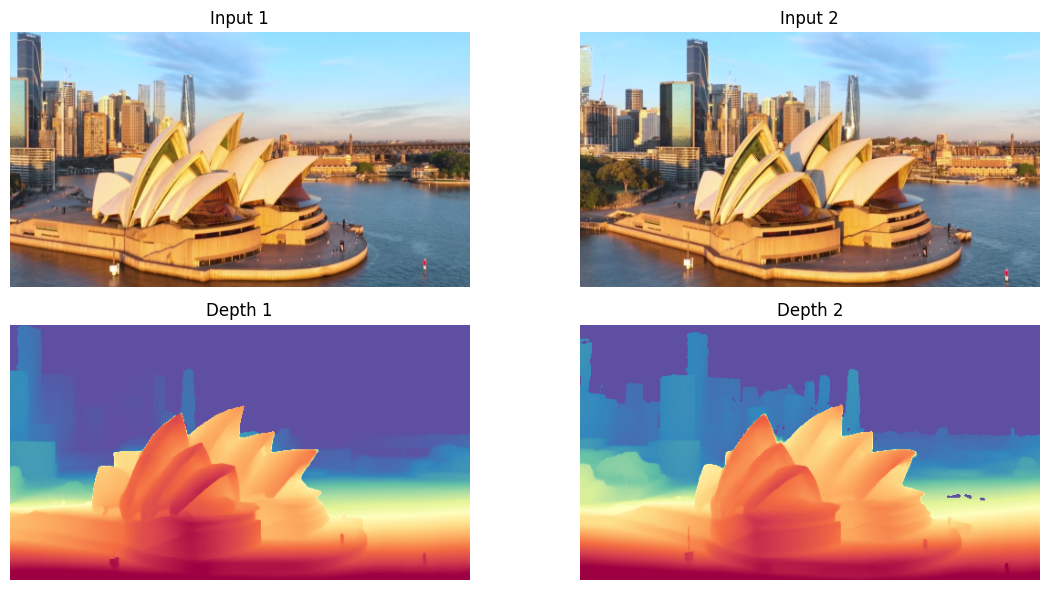

In [4]:
# Visualize input images and depth maps
n_images = prediction.depth.shape[0]

fig, axes = plt.subplots(2, 2, figsize=(12, 6))


for i in range(n_images):
    # Show original image
    # if prediction.processed_images is not None:
    axes[0, i].imshow(prediction.processed_images[i])
    axes[0, i].set_title(f"Input {i+1}")
    axes[0, i].axis('off')
    
    # Show depth map
    depth_vis = visualize_depth(prediction.depth[i], cmap="Spectral")
    axes[1, i].imshow(depth_vis)
    axes[1, i].set_title(f"Depth {i+1}")
    axes[1, i].axis('off')
    
plt.tight_layout()
plt.show()

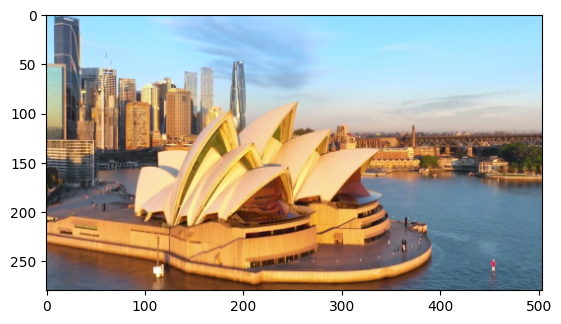

In [5]:
plt.imshow(prediction.processed_images[0])

In [6]:
d1 = prediction.depth[0]
print(d1.shape)
net_output = d1[200,150]
focal = 1200  # assumed

metric_depth = focal * net_output / 300
print(metric_depth)

(280, 504)
15.178165


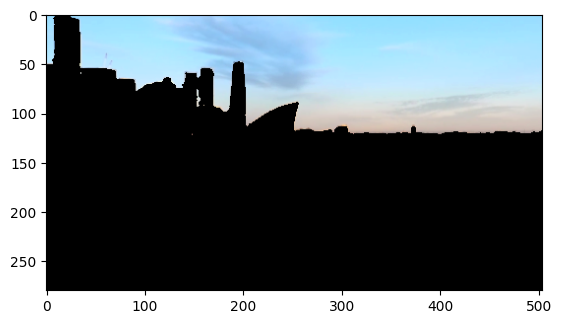

In [7]:
img1 = prediction.processed_images[0]
sky1 = prediction.sky[0]
mask1 = np.array(sky1, dtype=np.uint8)

op = cv2.bitwise_and(img1, img1, mask=mask1)
plt.imshow(op);

-----

In [12]:
# Load model from Hugging Face Hub
model = DepthAnything3.from_pretrained("depth-anything/da3-base")
model = model.to(device=device)

# Run inference on images
images = ["assets/examples/SOH/000.png",
          "assets/examples/SOH/010.png"]  # List of image paths, PIL Images, or numpy arrays

model.eval()

[INFO ] using MLP layer as FFN


DepthAnything3(
  (model): DepthAnything3Net(
    (backbone): DinoV2(
      (pretrained): DinoVisionTransformer(
        (patch_embed): PatchEmbed(
          (proj): Conv2d(3, 768, kernel_size=(14, 14), stride=(14, 14))
          (norm): Identity()
        )
        (rope): RotaryPositionEmbedding2D()
        (blocks): ModuleList(
          (0-3): 4 x Block(
            (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
            (attn): Attention(
              (qkv): Linear(in_features=768, out_features=2304, bias=True)
              (q_norm): Identity()
              (k_norm): Identity()
              (attn_drop): Dropout(p=0.0, inplace=False)
              (proj): Linear(in_features=768, out_features=768, bias=True)
              (proj_drop): Dropout(p=0.0, inplace=False)
            )
            (ls1): LayerScale(768, init_values=1.0, inplace=False)
            (drop_path1): Identity()
            (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      

In [13]:
prediction = model.inference(
    images,
    export_dir="output",
    export_format="glb"  # Options: glb, npz, ply, mini_npz, gs_ply, gs_video
)

# Access results
print(prediction.depth.shape)        # Depth maps: [N, H, W] float32
print(prediction.conf.shape)         # Confidence maps: [N, H, W] float32
print(prediction.extrinsics.shape)   # Camera poses (w2c): [N, 3, 4] float32
print(prediction.intrinsics.shape)   # Camera intrinsics: [N, 3, 3] float32

[INFO ] Processed Images Done taking 0.10848855972290039 seconds. Shape:  torch.Size([2, 3, 280, 504])
[INFO ] Model Forward Pass Done. Time: 0.7558028697967529 seconds
[INFO ] Conversion to Prediction Done. Time: 0.00238800048828125 seconds
[INFO ] conf_thresh_percentile: 40.0
[INFO ] num max points: 1000000
[INFO ] Exporting to GLB with num_max_points: 1000000
[INFO ] Export Results Done. Time: 0.264556884765625 seconds
(2, 280, 504)
(2, 280, 504)
(2, 3, 4)
(2, 3, 3)
